In [60]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import Database 
from sqlalchemy import create_engine
from sqlalchemy.orm import close_all_sessions
import config

## Loading Data

In [61]:
# Creating Database Connection

# database_str = f'postgres://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_ADDRESS}:{POSTGRES_PORT}/{POSTGRES_DBNAME}'

# engine = create_engine(database_str)

In [62]:
# Reading Data from CSV and assign to Dataframe
combined_df = pd.read_csv('../SQL/combined_wine_quality.csv')

#Viewing Dataframe
combined_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,id
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,red,20
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,red,70
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,red,796
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,red,1245
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,red,1089
5,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,red,563
6,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,1296
7,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4,red,69
8,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5,red,528
9,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,red,1203


## Exploring Data

In [63]:
# List column Names
list(combined_df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color',
 'id']

In [64]:
# Checking for Null/Empty Values

combined_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
id                      0
dtype: int64

In [65]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,2043.535632
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,1436.926393
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,813.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1650.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,3274.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,4898.000000


## Visualizing Data

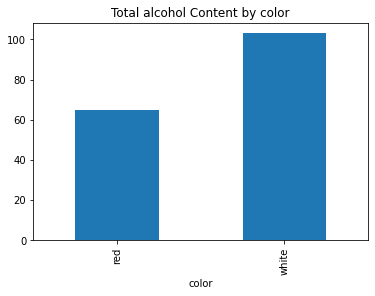

In [66]:
combined_df.groupby('color')['alcohol'].nunique().plot(kind='bar')
plt.title("Total alcohol Content by color")
plt.show()

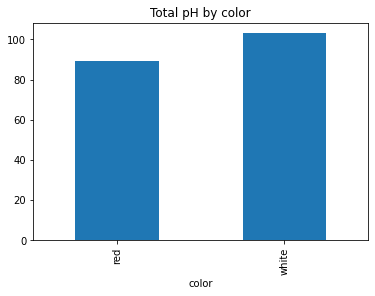

In [67]:
combined_df.groupby('color')['pH'].nunique().plot(kind='bar')
plt.title("Total pH by color")
plt.show()

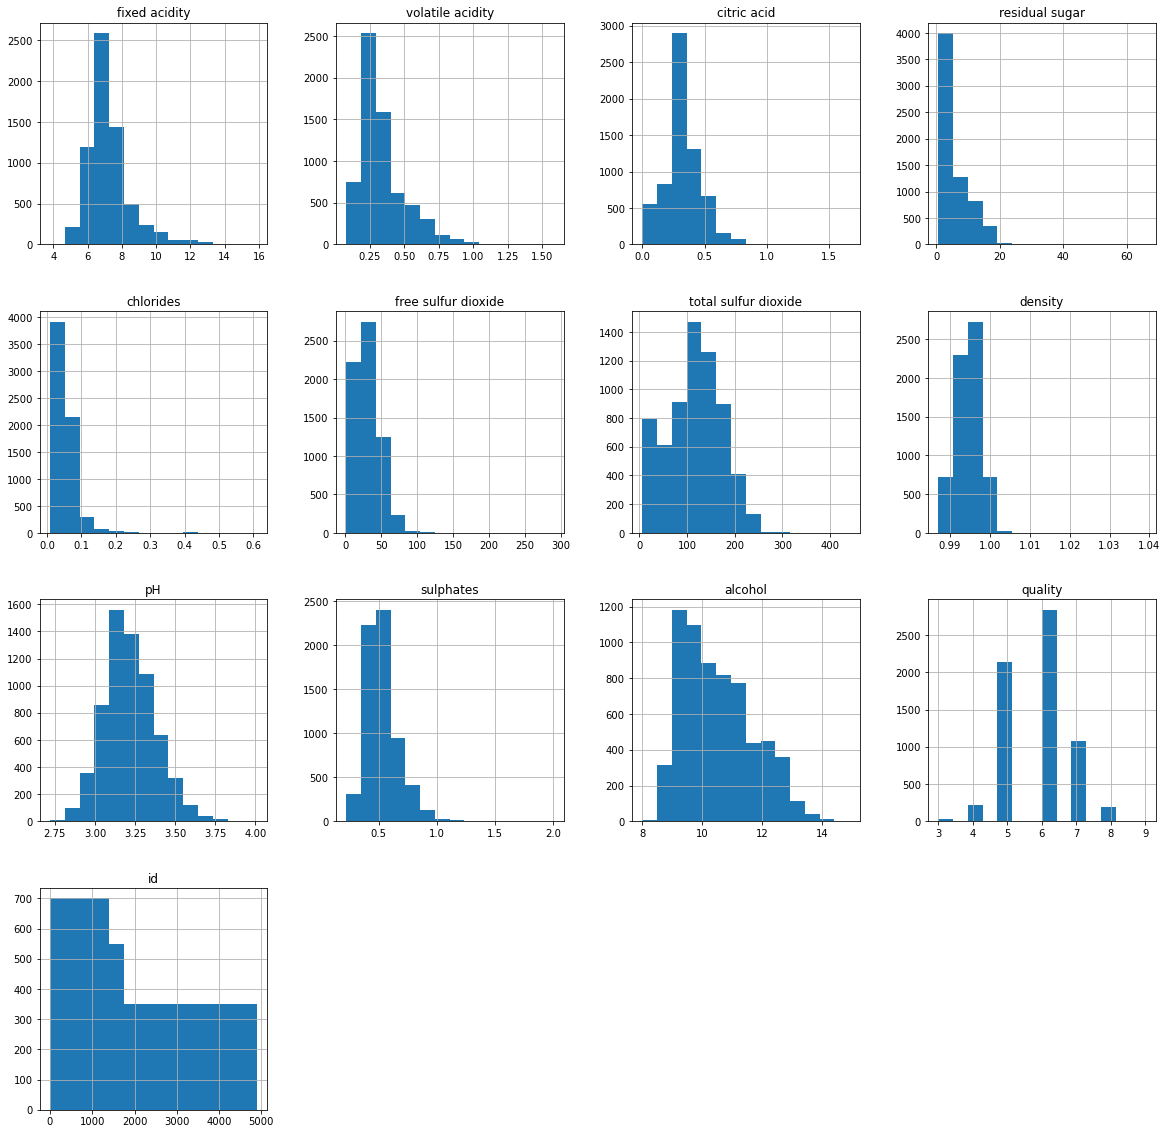

In [68]:
combined_df.hist(bins= 14, figsize=(20,20))
plt.show()

## Visualizing Grouped data

In [69]:
combined_df['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

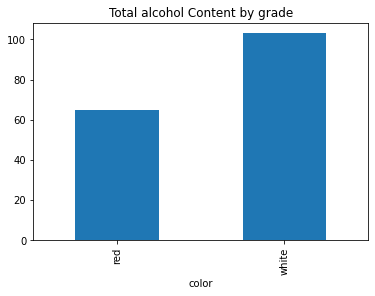

In [70]:
combined_df.groupby('color')['alcohol'].nunique().plot(kind='bar')
plt.title("Total alcohol Content by grade")
plt.show()

## Dropping insignifient columns which doesn't contribute to quality of the wine (id & color)

In [71]:
combined_df.drop(['id', 'quality'], axis=1, inplace=True)

## Importing ML Dependencies

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,balanced_accuracy_score, plot_confusion_matrix
from collections import Counter
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

## Splitting Training and Test

In [73]:
target = ["color"]

x = {'Current': 'color'}  
 
test_df = combined_df.replace(x)

x = dict.fromkeys(['alcohol', 'pH', 'sulphates', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'], 'color')

test_df = combined_df.copy().replace(x)

test_df.reset_index(inplace=True, drop=True)

# Create features
X = test_df.drop(['color'], axis=1)
X = pd.get_dummies(X)

#Create target
y = test_df['color']

In [74]:
# Create features
X = test_df.drop(['color'], axis=1)
X = pd.get_dummies(X)

#Create target
y = test_df[['color']]

In [75]:
test_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,red
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,red
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,red
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,red
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,red
5,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,red
6,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,red
7,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,red
8,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,red
9,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,red


In [76]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


## Normalizing Features 

In [77]:
# X_features = X.columns
# X=StandardScaler().fit_transform(X)

## Setting 4:1 ratio split b/w Training and Test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

print("Training:",Counter(y_train['color']))

print("Test:",Counter(y_test['color']))

Training: Counter({'white': 3673, 'red': 1199})
Test: Counter({'white': 1225, 'red': 400})


## Decision Tree Classifier

In [79]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [80]:
print("Accuracy:",accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.9846153846153847


In [81]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

         red       0.97      0.96      0.97       400
       white       0.99      0.99      0.99      1225

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



## confusion matrix for Decision Tree Classifier

In [82]:
cm = confusion_matrix(y_test, y_pred_dtc)
cm_df = pd.DataFrame(
    cm, index=['red', 'white'], columns=['red', 'white'])

cm_df

,red,white
red,385,15
white,10,1215


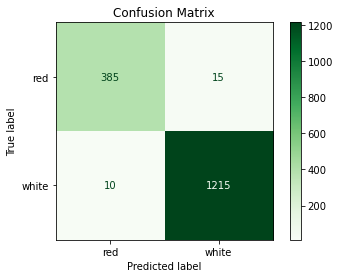

In [83]:
fig = plot_confusion_matrix(dtc, X_test, y_test, display_labels=['red', 'white'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier

In [84]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.9926153846153846


In [85]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         red       0.99      0.97      0.98       400
       white       0.99      1.00      1.00      1225

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [86]:
cm = confusion_matrix(y_test, y_pred_rfc)
cm_df = pd.DataFrame(
    cm, index=['red', 'white'], columns=['red', 'white'])

cm_df

,red,white
red,390,10
white,2,1223


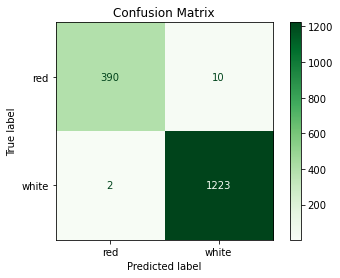

In [87]:
fig = plot_confusion_matrix(rfc, X_test, y_test, display_labels=['red', 'white'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

## Balanced Random Forest Classifier

In [88]:
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1, oob_score=True)
brfc.fit(X_train, y_train)
y_pred_brfc = brfc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.9926153846153846


## Display the confusion matrix 

In [89]:
cm = confusion_matrix(y_test, y_pred_brfc)
cm_df = pd.DataFrame(
    cm, index=['red', 'white'], columns=['red', 'white'])

cm_df

,red,white
red,394,6
white,5,1220


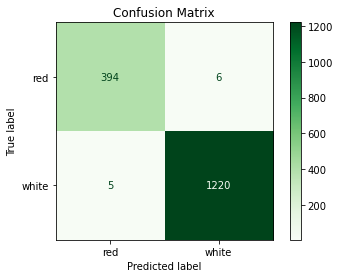

In [90]:
fig = plot_confusion_matrix(brfc, X_test, y_test, display_labels=['red', 'white'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting Classifier

In [91]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_gbc))

Accuracy: 0.992


In [92]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

         red       0.99      0.97      0.98       400
       white       0.99      1.00      0.99      1225

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



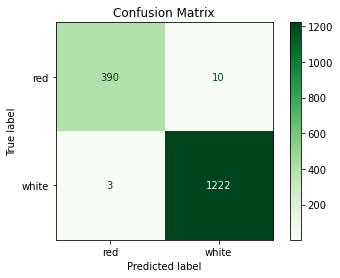

In [93]:
fig = plot_confusion_matrix(gbc, X_test, y_test, display_labels=['red', 'white'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

## Over Sampling

In [94]:
ros = RandomOverSampler(sampling_strategy='auto')
x_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print(Counter(y_resampled['color']))

Counter({'white': 3673, 'red': 3673})


In [95]:
# Train the Logistic Regression model using the resampled data
lr = LogisticRegression(random_state=1)
lr.fit(x_resampled, y_resampled)

y_pred_lr = lr.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9772307692307692


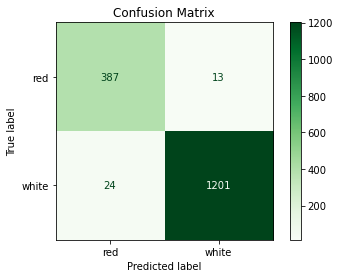

In [96]:
fig = plot_confusion_matrix(lr, X_test, y_test, display_labels=['red', 'white'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

## SMOTE Oversampling

In [97]:
oversampling = SMOTE(random_state=10, sampling_strategy='auto')

X_over, y_over = oversampling.fit_resample(X_train, y_train)
print(Counter(y_over['color']))

Counter({'white': 3673, 'red': 3673})


In [98]:
smote_clf = LogisticRegression(random_state=1)
smote_clf.fit(X_over, y_over)
y_pred_smote = smote_clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_smote))

Accuracy: 0.9772307692307692


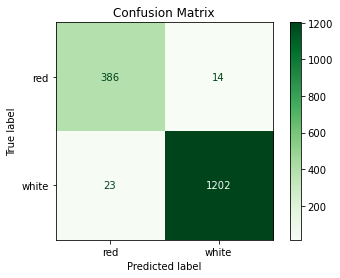

In [99]:
fig = plot_confusion_matrix(smote_clf, X_test, y_test, display_labels=['red', 'white'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

Under Sampling

In [100]:
us = ClusterCentroids(random_state=1, sampling_strategy='auto')
X_under, y_under = us.fit_resample(X_train, y_train)
print(Counter(y_under['color']))

Counter({'red': 1199, 'white': 1199})


In [101]:
# Train the Logistic Regression model using the resampled data
classifier_cluster_centroid = LogisticRegression(random_state=1)
classifier_cluster_centroid.fit(X_under, y_under)
y_pred_us = classifier_cluster_centroid.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_us))

Accuracy: 0.9704615384615385


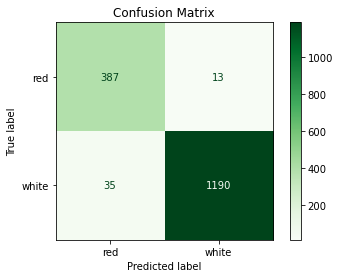

In [102]:
fig = plot_confusion_matrix(classifier_cluster_centroid, X_test, y_test, display_labels=['red', 'white'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

## Combination of Over and Under Sampling

In [103]:
combined = SMOTEENN(random_state = 42, sampling_strategy='all', smote=oversampling) # smote object is over
X_combined, y_combined = combined.fit_resample(X_train, y_train)
print(Counter(y_combined['color']))

Counter({'red': 3501, 'white': 3219})


In [104]:
# Train the Logistic Regression model using the resampled data
classifier_combined = LogisticRegression(random_state=1)
classifier_combined.fit(X_combined, y_combined)
y_pred_combined = classifier_combined.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_combined))

Accuracy: 0.9710769230769231


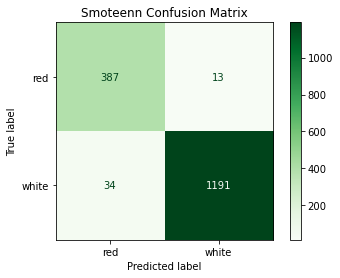

In [105]:
fig = plot_confusion_matrix(classifier_combined, X_test, y_test, display_labels=['red', 'white'], cmap='Greens')
plt.title('Smoteenn Confusion Matrix')
plt.show()

## Features comparison b/w the models

(<AxesSubplot:title={'center':'Feature Importance by Decision Tree'}>,
 Text(0.5, 1.0, 'Feature Importance by Decision Tree'))

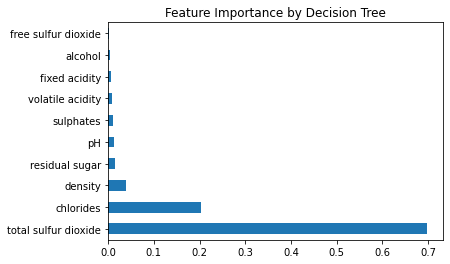

In [106]:
decision_tree_features = pd.Series(dtc.feature_importances_, index=X.columns)
decision_tree_features.nlargest(10).plot(kind='barh'), plt.title('Feature Importance by Decision Tree')

(<AxesSubplot:title={'center':'Feature importance by Random Forest'}>,
 Text(0.5, 1.0, 'Feature importance by Random Forest'))

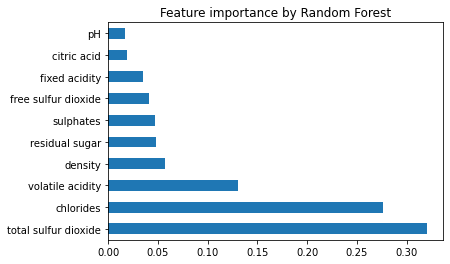

In [107]:
random_forest_features = pd.Series(rfc.feature_importances_, index=X.columns)
random_forest_features.nlargest(10).plot(kind='barh'), plt.title('Feature importance by Random Forest')

(<AxesSubplot:title={'center':'Feature importance by Balanced Random Forest'}>,
 Text(0.5, 1.0, 'Feature importance by Balanced Random Forest'))

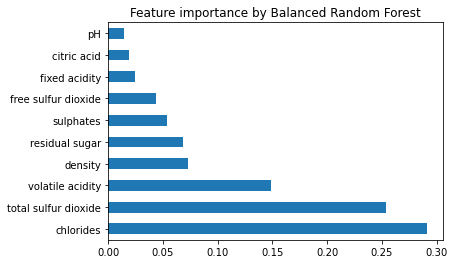

In [108]:
balanced_random_forest_features = pd.Series(brfc.feature_importances_, index=X.columns)
balanced_random_forest_features.nlargest(10).plot(kind='barh'), plt.title('Feature importance by Balanced Random Forest')

(<AxesSubplot:title={'center':'Feature importance by Gradient Boosting Classifier'}>,
 Text(0.5, 1.0, 'Feature importance by Gradient Boosting Classifier'))

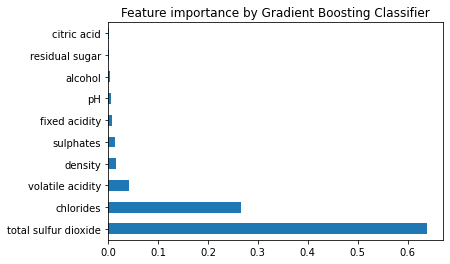

In [109]:
gradient_boosting_classifier_features = pd.Series(gbc.feature_importances_, index=X.columns)
gradient_boosting_classifier_features.nlargest(10).plot(kind='barh'), plt.title('Feature importance by Gradient Boosting Classifier')

## Comparing Model Features in Single graph

<AxesSubplot:>

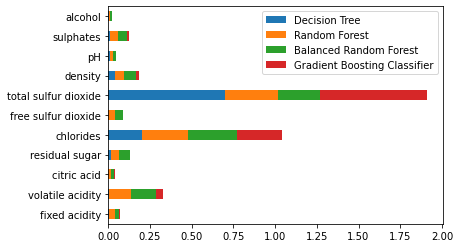

In [110]:
compare_features_by_model = pd.DataFrame({'Decision Tree': decision_tree_features, 'Random Forest': random_forest_features, 'Balanced Random Forest': balanced_random_forest_features, 'Gradient Boosting Classifier': gradient_boosting_classifier_features})

compare_features_by_model.plot(kind='barh', stacked=True)

## Compare Features b/w color

In [111]:
red_wine = combined_df[combined_df['color'] == 'red']
white_wine = combined_df[combined_df['color'] == 'white']

red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [112]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [113]:
combined_clasification_report_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Support'])
combined_clasification_report_df.loc['Decision Tree'] = dtc.score(X_test, y_test)
combined_clasification_report_df.loc['Random Forest'] = rfc.score(X_test, y_test)
combined_clasification_report_df.loc['Balanced Random Forest'] = brfc.score(X_test, y_test)
combined_clasification_report_df.loc['Gradient Boosting Classifier'] = gbc.score(X_test, y_test)

combined_clasification_report_df.head()


,Accuracy,Precision,Recall,F1-Score,Support
Decision Tree,0.984615,0.984615,0.984615,0.984615,0.984615
Random Forest,0.992615,0.992615,0.992615,0.992615,0.992615
Balanced Random Forest,0.993231,0.993231,0.993231,0.993231,0.993231
Gradient Boosting Classifier,0.992000,0.992000,0.992000,0.992000,0.992000
